# Analyse de la qualité des données

## Prise de connaissance avec le jeu de données

### Chargement des données brut

In [1]:
from getting_started import df_patient, df_pcr

Conversion de chaque attribut du référentiel en un type de données plus spécifique.

In [2]:
df_patient = df_patient.convert_dtypes()

df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   patient_id     20000 non-null  Int64 
 1   given_name     19560 non-null  string
 2   surname        19575 non-null  string
 3   street_number  19618 non-null  Int64 
 4   address_1      19204 non-null  string
 5   suburb         19788 non-null  string
 6   postcode       19801 non-null  string
 7   state          18010 non-null  string
 8   date_of_birth  17989 non-null  Int64 
 9   age            16003 non-null  Int64 
 10  phone_number   19081 non-null  string
 11  address_2      7893 non-null   string
dtypes: Int64(4), string(8)
memory usage: 1.9 MB


Conversion de chaque attribut de l'échantillon en un type de données plus spécifique.

In [3]:
df_pcr = df_pcr.convert_dtypes()

df_pcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  8800 non-null   Int64 
 1   pcr         8800 non-null   string
dtypes: Int64(1), string(1)
memory usage: 146.2 KB


### Présence de doublons sur l'identifiant

In [4]:
with_duplicated_id = df_patient.patient_id.duplicated(keep=False)

df_patient[with_duplicated_id].sort_values("patient_id")

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
12117,109304,zachary,farronato,30,outtrim avenue,como,2196,vic,19090801,31,07 22894061,the reefs
14839,109304,bailey,donaldson,20,tardent street,ryde,0812,qld,19580310,26,07 13479210,<NA>
4386,110207,toby,brock,4,merriman crescent,baralaba,3025,nsw,19000424,35,08 33842007,leitrim
12989,110207,zali,brock,32,hedger street,toorak,5038,act,<NA>,22,08 96818512,<NA>
10184,115791,hannah,clarke,70,galmarra street,mayfield,7010,vic,19830828,25,04 70760611,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
10507,990695,erin,braunack,49,moondarra street,broken hill,2640,qld,19830122,30,03 69523317,yuulong
8764,990936,amy,royle,90,whittell crescent,coramba,5032,sa,19950326,<NA>,08 07309295,tewantin plaza
12563,990936,samantha,green,21,brierly street,ardrossan,2140,<NA>,19380210,29,02 51600621,<NA>
2385,994235,trent,stewart-jones,129,macfarland crescent,wangaratta,2732,nsw,<NA>,<NA>,07 98662458,mountview


Il y a 403 patients qui doublonnent sur l'identifiant.

### Présence de doublons sur l'ensemble des attributs

In [5]:
with_same_attributes = df_patient.drop(columns="patient_id").duplicated(keep=False)

df_patient[with_same_attributes].sort_values(by=["surname", "given_name"])

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
6981,804259,charlie,gamlin,33,nungara street,bayswater,5251,qld,19190111,24,04 33326042,<NA>
12438,107928,charlie,gamlin,33,nungara street,bayswater,5251,qld,19190111,24,04 33326042,<NA>
15184,744576,freya,jaffres,50,hart place,biggera waters,4413,wa,<NA>,33,07 76055136,<NA>
17522,449738,freya,jaffres,50,hart place,biggera waters,4413,wa,<NA>,33,07 76055136,<NA>
5729,973030,delaney,kermeen,9,wallen place,st kilda east,4405,qld,19391226,25,08 37919311,<NA>
15337,373129,delaney,kermeen,9,wallen place,st kilda east,4405,qld,19391226,25,08 37919311,<NA>
1052,664037,samantha,laundy,2,mannheim street,quairading,4740,qld,19480111,<NA>,02 37735421,stanton
18867,421721,samantha,laundy,2,mannheim street,quairading,4740,qld,19480111,<NA>,02 37735421,stanton
1863,658924,lewis,matthews,24,allawah flats,attunga,3216,wa,19690623,26,03 95122427,<NA>
1944,669936,lewis,matthews,24,allawah flats,attunga,3216,wa,19690623,26,03 95122427,<NA>


Il y 22 patients qui doublonnent sur tous les attributs hors identifiant.

### Nombre d'attributs non renseignés par patient

<AxesSubplot:xlabel='attributs non renseignés', ylabel='patients'>

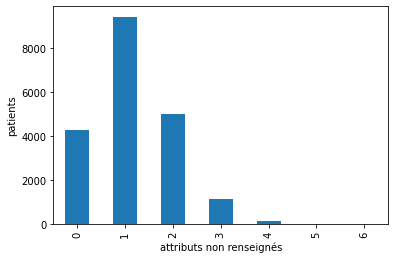

In [53]:
df_patient.isna().sum(axis="columns").value_counts().sort_index().plot.bar(xlabel="attributs non renseignés", ylabel="patients")

La majorité des patients ont jusqu'à 2 attributs non renseignés.

Il y aura des cas extrêmes à rapprocher avec 5 voire 6 attributs manquants.

### Répartition des valeurs du test PCR

In [6]:
df_pcr.pcr.value_counts()

N           3482
Negative    3134
Positive    1283
P            901
Name: pcr, dtype: Int64

Deux conventions sont utilisées pour représenter les deux valeurs possibles d'un test PCR (négatif ou positif) : `N / P` et `Negative / Positive`.

Il faudra normaliser ces résultats dans une variable catégorielle ordonnée.

### Exhaustivité du référentiel

In [7]:
df_pcr.patient_id.isin(df_patient.patient_id).all()

True

L'intégralité des identifiants associés aux tests de l'échantillon sont présents dans le référenciel.

## Analyse du référenciel de patients

### Nom et prénom

#### Valeurs manquantes

In [8]:
df_na_in_patient_name = df_patient[["surname", "given_name"]].isna()

df_na_in_patient_name.value_counts()

surname  given_name
False    False         19139
         True            436
True     False           421
         True              4
dtype: int64

Il y a 861 patients dont le nom et / ou prénom ne sont pas renseignés.

#### Fautes typographiques

In [54]:
from jellyfish import damerau_levenshtein_distance

df_patient["full_name"] = df_patient.agg(
    lambda x: f"{x.given_name} {x.surname}", axis="columns")

df_full_name = df_patient[["patient_id", "full_name", "phone_number"]].dropna()
df_full_name = df_full_name.merge(df_full_name, on="phone_number")
df_full_name = df_full_name[df_full_name.patient_id_x != df_full_name.patient_id_y]
df_full_name["linked_ids"] = df_full_name[["patient_id_x", "patient_id_y"]].apply(
    lambda row: tuple(sorted(row)), axis="columns")
df_full_name.drop_duplicates("linked_ids", inplace=True)
df_full_name["distance"] = df_full_name.apply(
    lambda row: damerau_levenshtein_distance(row.full_name_x, row.full_name_y), axis="columns")

df_full_name = df_full_name[df_full_name.distance >= 1]

Cette cellule procède à un rapprochement des patients partageant un même numéro de téléphone et calcule la similarité entre leurs noms complets sous forme d'une distance.

Le numéro de téléphone, quand il est fourni, est un attribut à forte valeur distinctive d'où son utilisation dans le cross-join.

La distance choisie est Damerau-Levenshtein car elle est particulièrement adaptée pour détecter les fautes humaines qui peuvent arriver lors de la saisie répétée de texte brut.

In [55]:
df_full_name[df_full_name.distance <= 2].sort_values("phone_number").head(20)

,patient_id_x,full_name_x,phone_number,patient_id_y,full_name_y,linked_ids,distance
4192,311830,taaila <NA>,02 00325977,210155,taalia <NA>,"(210155, 311830)",1
4193,311830,taaila <NA>,02 00325977,525466,taalia <NA>,"(311830, 525466)",1
990,123387,adam schumajnn,02 01272164,505218,adam schumann,"(123387, 505218)",1
991,123387,adam schumajnn,02 01272164,375877,adam schumann,"(123387, 375877)",1
985,431593,adam schumann,02 01272164,123387,adam schumajnn,"(123387, 431593)",1
1827,489678,jacob svenson,02 03546747,909797,jaob svenson,"(489678, 909797)",1
1831,669354,jacob svenson,02 03546747,909797,jaob svenson,"(669354, 909797)",1
1835,576055,jacob svenson,02 03546747,909797,jaob svenson,"(576055, 909797)",1
570,736584,<NA> petersen,02 03687263,399260,<NA> peterssen,"(399260, 736584)",1
574,950122,<NA> petersen,02 03687263,399260,<NA> peterssen,"(399260, 950122)",1


Dans le cas d'une distance faible, on retrouve les fautes typographiques suivantes :

- Ajout de caractère (schumajnn -> schumann)
- Omission de caractère (jaob -> jacob)
- Substitution de caractère (martincvic -> martinovic)
- Transposition de caractère (taaila -> taalia)

### Autres différences

In [31]:
df_full_name[df_full_name.distance > 2].sort_values("phone_number").head(20)

,patient_id_x,full_name_x,phone_number,patient_id_y,full_name_y,linked_ids,distance
6144,953966,to godfrey,02 01871708,405442,thomas godfrey,"(405442, 953966)",4
16219,382081,james <NA>,02 03755662,687453,jim <NA>,"(382081, 687453)",3
5702,970678,stacia seddon,02 05657798,963018,anastasia seddon,"(963018, 970678)",4
5705,496474,stacia seddon,02 05657798,963018,anastasia seddon,"(496474, 963018)",4
10877,898204,jordan ballantyne,02 13710140,494861,ballantyne jordan,"(494861, 898204)",14
10878,898204,jordan ballantyne,02 13710140,219095,<NA> ballantyne,"(219095, 898204)",6
10881,740337,jordan ballantyne,02 13710140,494861,ballantyne jordan,"(494861, 740337)",14
10886,494861,ballantyne jordan,02 13710140,219095,<NA> ballantyne,"(219095, 494861)",12
10882,740337,jordan ballantyne,02 13710140,219095,<NA> ballantyne,"(219095, 740337)",6
15131,414444,joshua white,02 14864045,388581,joshua wight,"(388581, 414444)",3


Pour les cas où la distance est plus forte, on relève d'autres différences :

- Faute lexicale (wight -> white)
- Diminutif du prénom (thomas -> to, anastasia -> stacia)
- Substitution du prénom (james -> jim, emiily -> millie)
- Inversion des nom et prénom
- Omission du prénom ou du nom

## Âge et date de naissance

### Valeurs manquantes

In [57]:
df_patient[["date_of_birth", "age"]].isna().value_counts()

date_of_birth  age  
False          False    14391
               True      3598
True           False     1612
               True       399
dtype: int64

### 

### Répartition des âges

In [69]:
df_patient.age.describe()

count    16003.000000
mean        27.534337
std          7.807008
min          0.000000
25%         24.000000
50%         29.000000
75%         33.000000
max         92.000000
Name: age, dtype: float64

<AxesSubplot:xlabel="catégorie d'âge", ylabel='patients'>

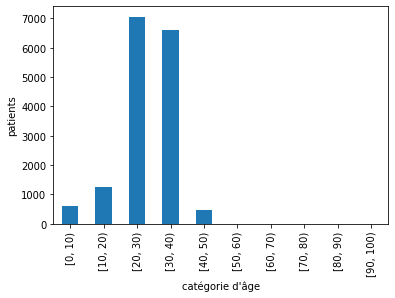

In [77]:
from pandas import cut

df_patient_age = cut(df_patient.age.dropna(), bins=range(0, 101, 10), right=False)

df_patient_age.value_counts().sort_index().plot.bar(xlabel="catégorie d'âge", ylabel="patients")

<AxesSubplot:xlabel='âge', ylabel='patients'>

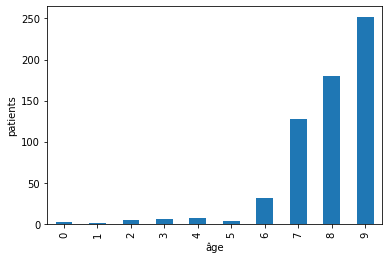

In [89]:
df_patient[df_patient.age < 10].age.value_counts().sort_index().plot.bar(xlabel="âge", ylabel="patients")

On remarquera la présence de quelques patients en très bas âge (inférieur à 6 ans).

Je n'ai pas connaissance d'une quelconque limite d'âge pour les tests PCR (à demander).

### Dates de naissance invalides

La date de naissance est encodé au format YYYYMMDD sur un entier.

Il faut d'abord la convertir en `datetime` pour la valider.

In [124]:
from pandas import to_datetime

dob_datetime = to_datetime(df_patient.date_of_birth, format="%Y%M%d", errors="coerce")

dob_invalid = df_patient[dob_datetime.isna()].date_of_birth.dropna().astype(str).str.extract(
    r"(\d{4})(\d{2})(\d{2})", expand=True).rename(columns={0: "year", 1: "month", 2: "day"})

dob_invalid


,year,month,day
40,1903,05,39
145,1917,93,18
244,1954,12,42
481,1999,03,53
539,1932,88,14
...,...,...,...
19684,1967,98,25
19875,1933,99,19
19928,1955,04,80
19949,1991,02,37


Il y a 106 patients pour lesquels le format de la date de naissance est non conforme (mois ou jour aberrant).

### Incohérence entre date de naissance et âge déclaré

In [158]:
from pandas import Timestamp

age_from_dob = (Timestamp("2020-01-01") - dob_datetime).dt.days.floordiv(365.25).rename("age_from_dob")

dob_and_ages = df_patient.merge(age_from_dob, left_index=True, right_index=True)[["date_of_birth", "age", "age_from_dob"]].dropna()

dob_and_ages.sample(10, random_state=42)

,date_of_birth,age,age_from_dob
6244,19961203,30,23.0
18566,19831222,30,36.0
1414,19520202,30,67.0
11958,19300612,32,89.0
12137,19281218,32,91.0
8031,19220313,32,97.0
5362,19040627,8,115.0
17012,19441224,31,75.0
669,19270517,25,92.0
3307,19460421,22,73.0


L'échantillon montre une absence de cohérence entre âge et date de naissance.

In [155]:
from numpy import isclose

isclose(dob_and_ages["age"].astype(int), dob_and_ages["age_from_dob"].astype(int), atol=1).sum()

364

Seul 364 patients ont un âge cohérent avec leur date de naissance avec une tolérance de 1 an (car on ne sait pas quand le patient a été enregistré en 2020).

Cela ne servira donc à rien d'imputer les âges manquants avec la dâte de naissance au vue de sa fiabilité. Par contre, elle peut toujours être utile comme élément d'identification.

## Analyse des états et codes postaux

Valeurs manquantes

In [ ]:
df_patient[["state", "postcode"]].isna().value_counts()

Valeurs des états

In [ ]:
states = df_patient.state.dropna().value_counts()

print(states[:8])
print(states[8:])
print(states[8:].sum())

Incohérence état / postcode

In [ ]:
postcodes = df_patient.postcode.dropna().value_counts()

Inversion postcode / quartier

In [ ]:
df_patient.loc[df_patient.suburb.str.isnumeric()]

## Sanitize postcode and state

Assume postcode is more reliable than state.
Test all postcodes are valid.
Case postcode invalid, try swap with suburb.
Test some state are invalid.
Normalize state with typos.
For missing or invalid states, guess from postcode.
Keep state if postcode invalid.


In [ ]:
df_patient.state = df_patient.state.str.upper()
df_patient_invalid_postcode = df_patient[df_patient.state.isin(["NSW", "VIC", "QLD", "WA", "SA", "TAS", "ACT", "NT"])]
df_patient_vic = df_patient_invalid_postcode.loc[df_patient_invalid_postcode.state == "VIC"]
df_patient_vic.loc[~df_patient_vic.postcode.str.match(r"[3|8]\d{3}")].head()

## Sanitize phone numbers

- Format XX XXXXXXXX, 04 if mobile
- Must be coherent with postcode


In [ ]:
df_patient.loc[~df_patient.phone_number.str.match(r"\d{2}\s\d{8}")].phone_number.count()